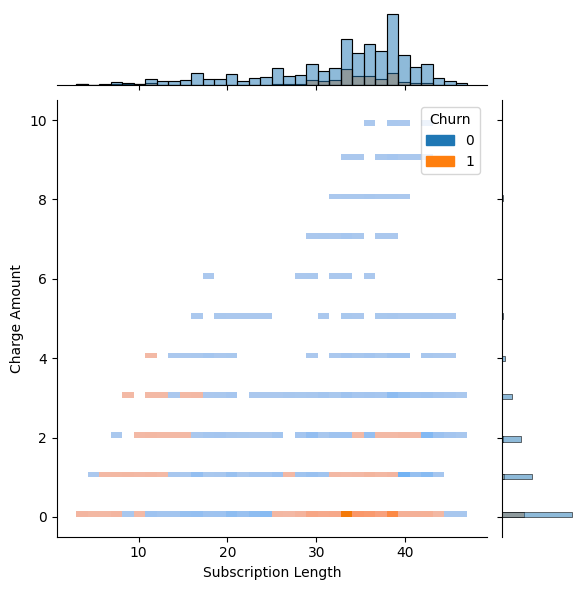

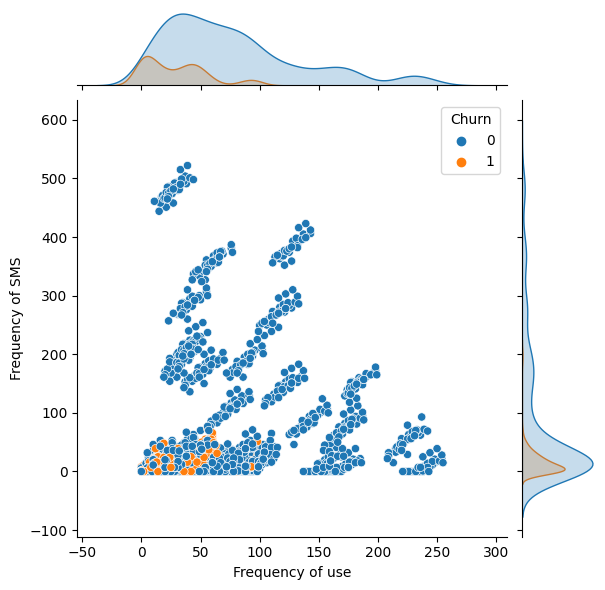

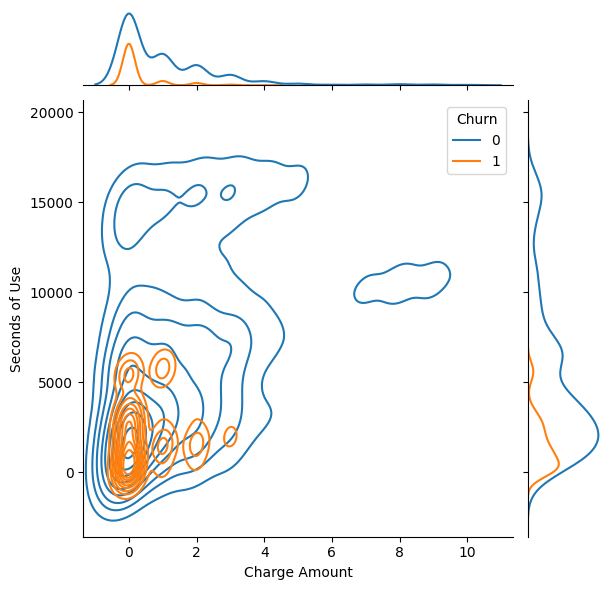

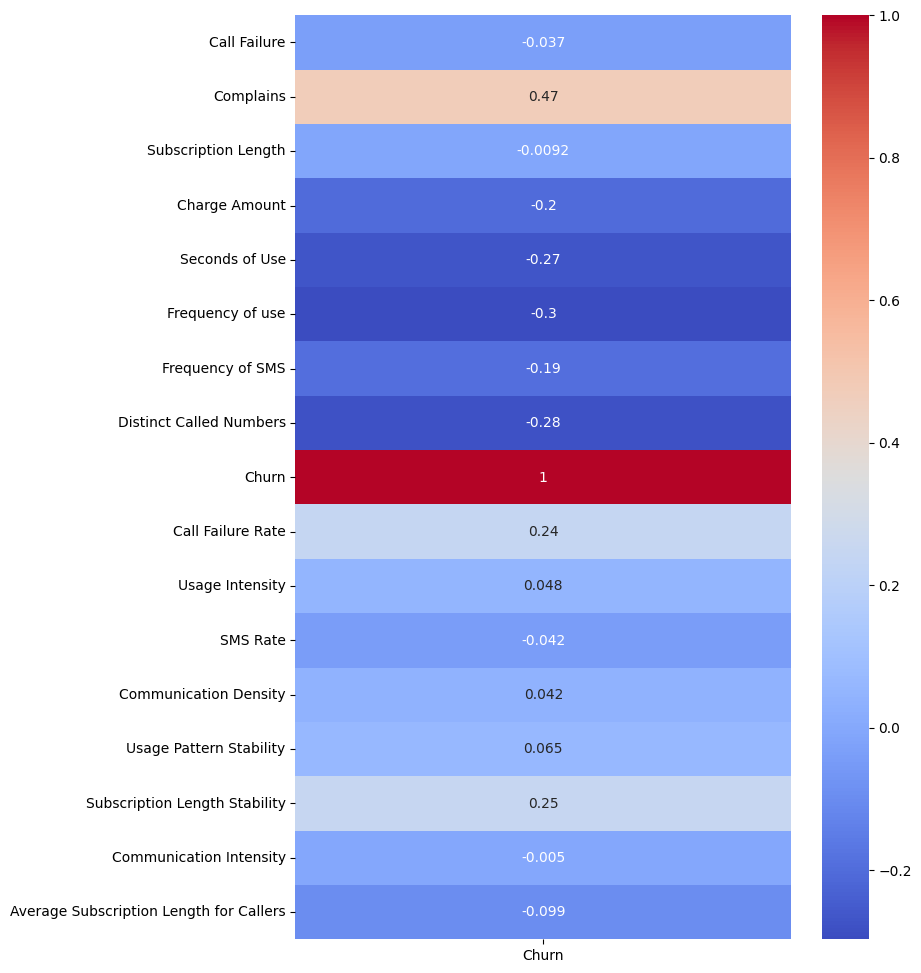

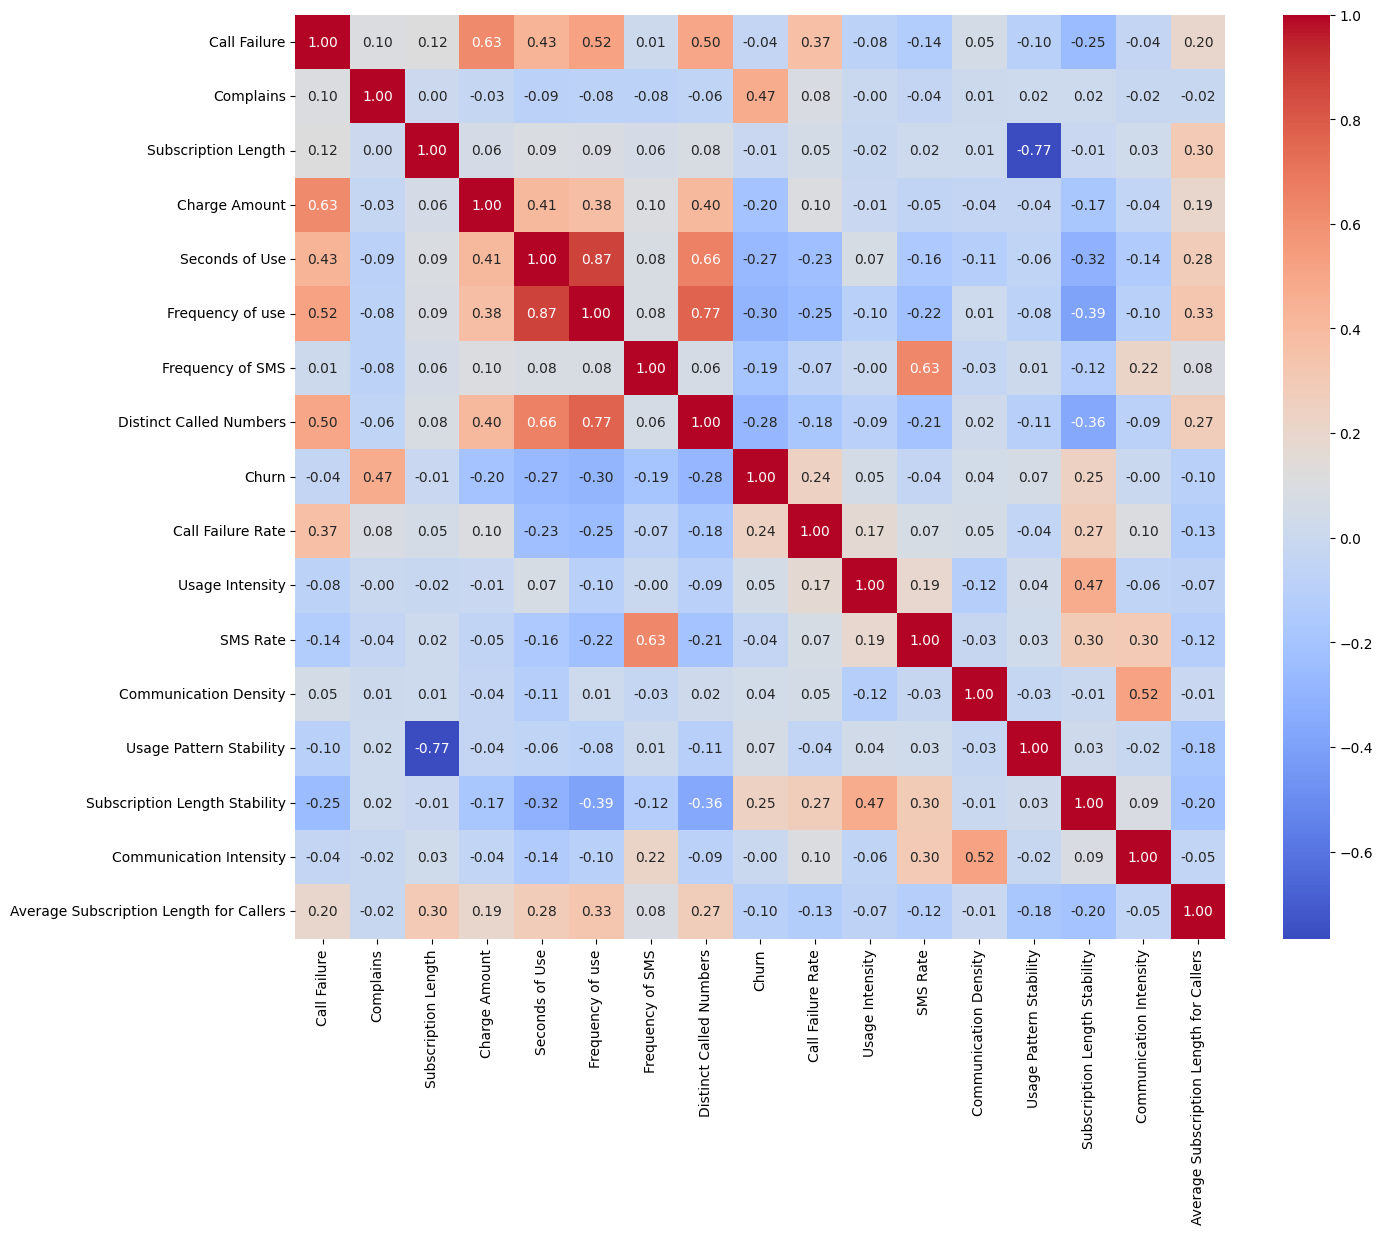

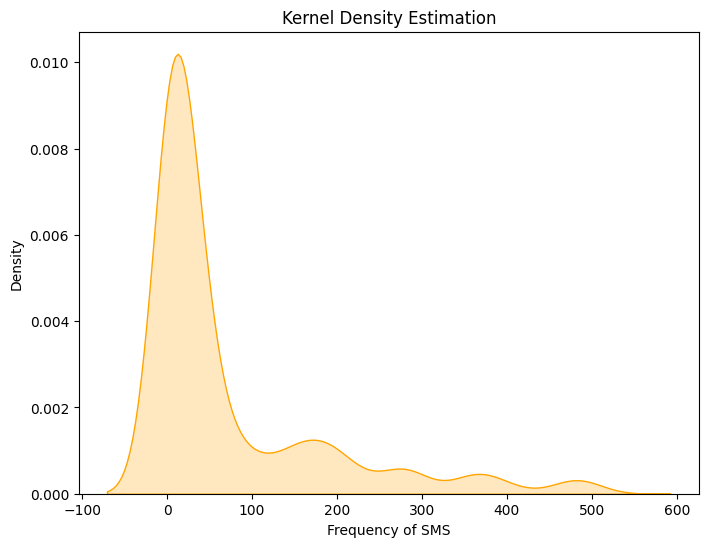

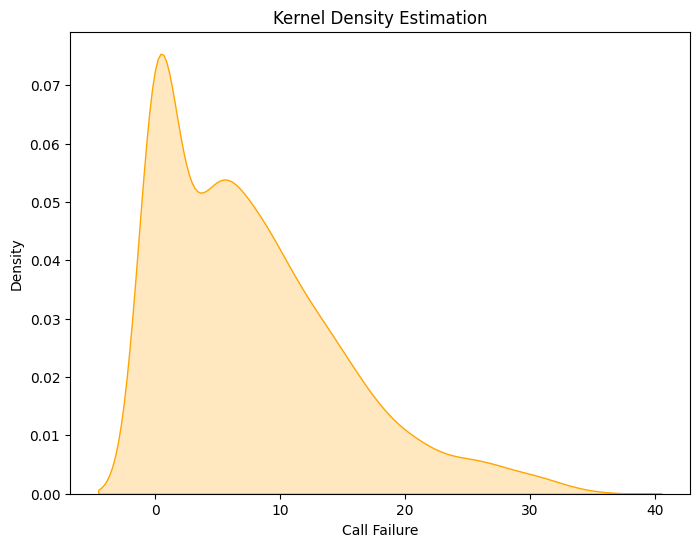

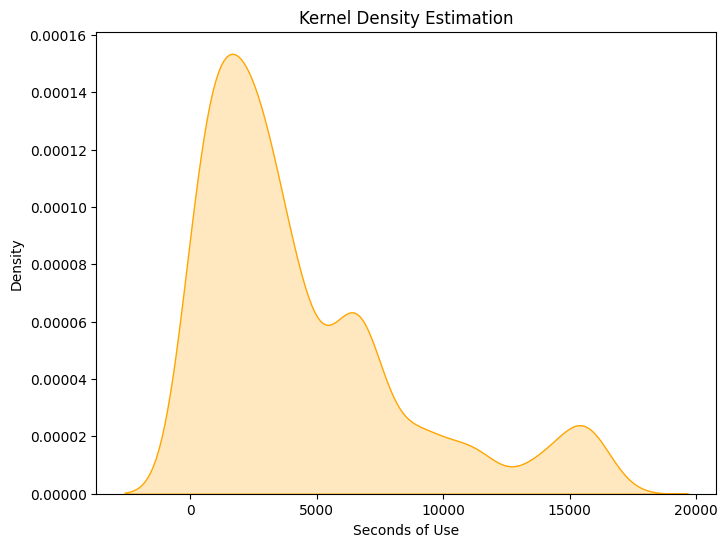

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score

%run "02. EDA.ipynb"

In [2]:
features = ['Call Failure', 
            'Complains', 
            'Subscription Length', 
            'Charge Amount', 
            'Seconds of Use',
            'Frequency of use', 
            'Frequency of SMS', 
            'Distinct Called Numbers']
target = 'Churn'

X = df2[features]
y = df2[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[502  18]
 [ 70  40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       520
           1       0.69      0.36      0.48       110

    accuracy                           0.86       630
   macro avg       0.78      0.66      0.70       630
weighted avg       0.84      0.86      0.84       630


Accuracy Score: 0.8603174603174604


In [3]:

features = ['Call Failure', 
            'Complains', 
            'Subscription Length', 
            'Charge Amount', 
            'Seconds of Use',
            'Frequency of use', 
            'Frequency of SMS', 
            'Distinct Called Numbers']

target = 'Churn'
X = df2[features]
y = df2[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression(random_state=42)

scoring_metrics = {
    'Accuracy': 'accuracy',
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score)
}

for metric, scoring_method in scoring_metrics.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring=scoring_method)
    print(f"Mean {metric}:", cv_scores.mean())


Mean Accuracy: 0.8898412698412699
Mean Precision: 0.8086355399591586
Mean Recall: 0.39191919191919194
Mean F1: 0.5274817753237004


In [4]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Epoch 1/20
63/63 [==============================] - 2s 8ms/step - loss: nan - accuracy: 0.8433 - val_loss: nan - val_accuracy: 0.8631
Epoch 2/20
63/63 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.8433 - val_loss: nan - val_accuracy: 0.8631
Epoch 3/20
63/63 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.8433 - val_loss: nan - val_accuracy: 0.8631
Epoch 4/20
63/63 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.8433 - val_loss: nan - val_accuracy: 0.8631
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.8433 - val_loss: nan - val_accuracy: 0.8631
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.8433 - val_loss: nan - val_accuracy: 0.8631
Epoch 7/20
63/63 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.8433 - val_loss: nan - val_accuracy: 0.8631
Epoch 8/20
63/63 [==============================] - 0s 4ms/ste

In [5]:
features = ['Call Failure', 'Complains', 'Subscription Length', 'Charge Amount',
            'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers']
target = 'Churn'

X = df2[features]
y = df2[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

model_cnn = keras.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_cnn.fit(X_train_cnn, y_train, epochs=30, batch_size=32, validation_split=0.2)

y_pred_proba_cnn = model_cnn.predict(X_test_cnn)
y_pred_cnn = (y_pred_proba_cnn > 0.5).astype(int)

accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print(f"Accuracy (CNN): {accuracy_cnn:.4f}")

Epoch 1/30
63/63 [==============================] - 2s 13ms/step - loss: 0.4152 - accuracy: 0.8502 - val_loss: 0.2845 - val_accuracy: 0.9008
Epoch 2/30
63/63 [==============================] - 0s 7ms/step - loss: 0.2804 - accuracy: 0.8929 - val_loss: 0.2472 - val_accuracy: 0.9008
Epoch 3/30
63/63 [==============================] - 0s 6ms/step - loss: 0.2592 - accuracy: 0.8953 - val_loss: 0.2398 - val_accuracy: 0.9008
Epoch 4/30
63/63 [==============================] - 0s 6ms/step - loss: 0.2508 - accuracy: 0.8948 - val_loss: 0.2328 - val_accuracy: 0.9008
Epoch 5/30
63/63 [==============================] - 0s 8ms/step - loss: 0.2427 - accuracy: 0.8968 - val_loss: 0.2305 - val_accuracy: 0.9008
Epoch 6/30
63/63 [==============================] - 0s 6ms/step - loss: 0.2382 - accuracy: 0.8998 - val_loss: 0.2287 - val_accuracy: 0.9028
Epoch 7/30
63/63 [==============================] - 0s 7ms/step - loss: 0.2357 - accuracy: 0.9008 - val_loss: 0.2276 - val_accuracy: 0.9008
Epoch 8/30
63/63 [=

In [6]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_transformer = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_transformer = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

inputs = keras.Input(shape=(X_train_scaled.shape[1], 1))

attention_output = layers.MultiHeadAttention(num_heads=2, key_dim=2, dropout=0.3)(inputs, inputs)
pooled_output = layers.GlobalAveragePooling1D()(attention_output)
dense1 = layers.Dense(16, activation='relu')(pooled_output)
output = layers.Dense(1, activation='sigmoid')(dense1)

model_transformer = keras.Model(inputs=inputs, outputs=output)

model_transformer.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_transformer.fit(X_train_transformer, y_train, epochs=30, batch_size=32, validation_split=0.2)

y_pred_proba_transformer = model_transformer.predict(X_test_transformer)
y_pred_transformer = (y_pred_proba_transformer > 0.5).astype(int)

accuracy_transformer = accuracy_score(y_test, y_pred_transformer)
print(f"Accuracy (Transformer): {accuracy_transformer:.4f}")

Epoch 1/30
63/63 [==============================] - 5s 11ms/step - loss: nan - accuracy: 0.8413 - val_loss: nan - val_accuracy: 0.8631
Epoch 2/30
63/63 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.8433 - val_loss: nan - val_accuracy: 0.8631
Epoch 3/30
63/63 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.8433 - val_loss: nan - val_accuracy: 0.8631
Epoch 4/30
63/63 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.8433 - val_loss: nan - val_accuracy: 0.8631
Epoch 5/30
63/63 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.8433 - val_loss: nan - val_accuracy: 0.8631
Epoch 6/30
63/63 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.8433 - val_loss: nan - val_accuracy: 0.8631
Epoch 7/30
63/63 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.8433 - val_loss: nan - val_accuracy: 0.8631
Epoch 8/30
63/63 [==============================] - 0s 6ms/st